# Lab 3 examples

### Roundoff errors - example 3

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [7]:
A = np.array([[0.0001,1], [1,1]])
b = np.array([1,2])
b2 = np.array([1,2.0001])

In [8]:
A[0] = A[0]*10000
b[0] = b[0]*10000
b2[0] = b2[0]*10000

In [11]:
A[1] = A[1] - A[0]
b[1] = b[1] - b[0]
b2[1] = b2[1] - b2[0]

In [22]:
A[0] = A[0] - A[1]*(A[0][1]/A[1][1])
b[0] = b[0] - b[1]*(A[0][1]/A[1][1])
b2[0] = b2[0] - b2[1]*(A[0][1]/A[1][1])

In [27]:
A[1][1] = A[1][1]/A[1][1]
b[1] = b[1]/A[1][1]
b2[1] = b2[1]/A[1][1]

In [29]:
b

array([10000, -9998])

In [30]:
b2

array([10000.    , -9997.9999])

### DON'T NEED TO DO GAUSSIAN IN PYTHON, JUST DO THE FOLLLOWING!!

In [31]:
np.linalg.solve(A, b)

array([10000., -9998.])

In [32]:
np.linalg.solve(A, b2)

array([10000.    , -9997.9999])

### Matrix Inversion

In [33]:
A = np.array([[1,-2,1],[3,1,-1],[-1,9,5]])
np.linalg.inv(A)

array([[ 0.2       ,  0.27142857,  0.01428571],
       [-0.2       ,  0.08571429,  0.05714286],
       [ 0.4       , -0.1       ,  0.1       ]])

### Determinant

In [36]:
A = np.array([[3,-1,1],[1,5,-1],[-1,0,0]])
B = np.array([[4,-6,1],[1,-3,1],[2,0,-1]])

In [37]:
np.linalg.det(A)

4.000000000000002

^ this is a scalar value, therefore A has an inverse

In [38]:
np.linalg.det(B)

0.0

^ zero therefore B does not have an inverse

## Problem 1

In [19]:
L1 = 200
L2 = 500
L3 = 0.05
Q = 36*(10**12)
P1 = 1000
P2 = 2000
Ma = 5600*(10**12)
Mf = 360*(10**12)
Mo = 50000 *(10**12)

B = [[(-L1-L2-L3)*Ma, L2*Mf, L1*Mo], [L2*Ma, (-L2-L3)*Mf-Q, 0], [L1*Ma, Q, (-L1-L3)*Mo]]
C = [-P1, -P2,0]

In [20]:
np.linalg.solve(B, C)

array([3.57125010e-12, 5.55472262e-11, 4.00079961e-13])

In [22]:
L3 = 0

B = [[-L1-L2-L3, L2, L1], [L2, -L2-L3-Q, 0], [L1, Q, -L1-L3]]
C = [-P1, -P2,0]

In [23]:
np.linalg.solve(B, C)

LinAlgError: Singular matrix

In [9]:
L3 = 0
P1 = 0
P2 = 0

B = [[-L1-L2-L3, L2, L1], [L2, -L2-L3-Q, 0], [L1, Q, -L1-L3]]
C = [-P1, -P2,0]

In [10]:
np.linalg.solve(B, C)

LinAlgError: Singular matrix

## Problem 2

In [41]:
def problem2(N):
    A = np.zeros([N,N])
    A[0,0] = 1
    A[-1,-1] = 1

    for i in range(N-2):
        n = i+1
        A[n, i] = 1
        A[n, i+1] = -2
        A[n, i+2] = 1
    
    return A

In [42]:
n = np.linspace(5,50, 46)
K = [np.linalg.cond(problem2(int(N))) for N in n]

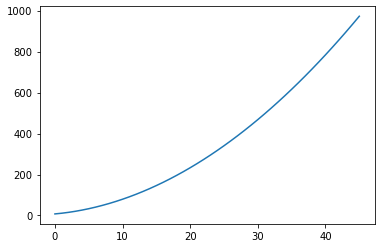

In [43]:
plt.plot(K)
#not quite linear

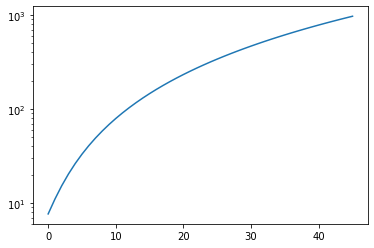

In [44]:
plt.plot(K)
plt.yscale("log")
#not linear once on log scale either therefore not exponential

In [45]:
# try again with slightly different setup for A matrix
def problem2b(N):
    A = np.zeros([N,N])
    A[0,0] = -2
    A[0,1] = 1
    A[-1,-1] = -2
    A[-1,-2] = 1

    for i in range(N-2):
        n = i+1
        A[n, i] = 1
        A[n, i+1] = -2
        A[n, i+2] = 1
    
    return A

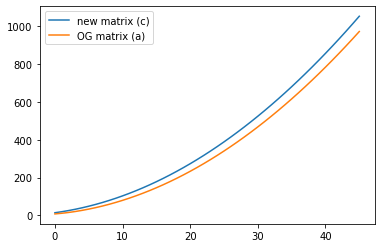

In [50]:
Kb = [np.linalg.cond(problem2b(int(N))) for N in n]

plt.plot(Kb, label = "new matrix (c)")
plt.plot(K, label = "OG matrix (a)")
plt.legend()

## Problem 3

In [76]:
def problem3a(N):
    A = np.zeros([N,N])
    A[0,0] = -2
    A[0,1] = 2
    A[-1,-1] = -2
    A[-1,-2] = 2

    for i in range(N-2):
        n = i+1
        A[n, i] = 1
        A[n, i+1] = -2
        A[n, i+2] = 1
    
    cond_a = np.zeros(N)
    cond_a[int(N/2)] = 1
    
    A = np.vstack([A, cond_a])
    
    return A

In [79]:
Ka = [np.linalg.cond(problem3a(int(N))) for N in n]

In [77]:
def problem3b(N):
    A = np.zeros([N,N])
    A[0,0] = -2
    A[0,1] = 2
    A[-1,-1] = -2
    A[-1,-2] = 2

    for i in range(N-2):
        n = i+1
        A[n, i] = 1
        A[n, i+1] = -2
        A[n, i+2] = 1
    
    cond_a = np.zeros(N)
    for i in range(N):
        cond_a[i] = 1/N
    
    A = np.vstack([A, cond_a])
    
    return A

In [80]:
Kb = [np.linalg.cond(problem3b(int(N))) for N in n]

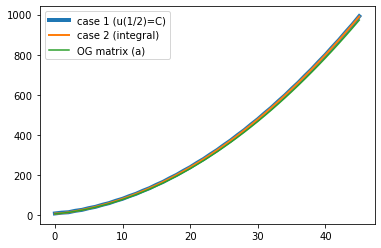

In [89]:
plt.plot(Ka, label = 'case 1 (u(1/2)=C)', linewidth = 4)
plt.plot(Kb, label = 'case 2 (integral)', linewidth = 2)
plt.plot(K, label = "OG matrix (a)")
plt.legend()
#identical

## Problem 4

In [96]:
def problem4a(N):
    A = np.zeros([N,N])
    A[0,0] = -2
    A[0,1] = 1
    A[0, -1] = 1
    A[-1,-1] = -2
    A[-1,-2] = 1
    A[-1, 0] = 1

    for i in range(N-2):
        n = i+1
        A[n, i] = 1
        A[n, i+1] = -2
        A[n, i+2] = 1
    
    cond_a = np.zeros(N)
    cond_a[int(N/2)] = 1
    
    A = np.vstack([A, cond_a])
    
    return A

K4a = [np.linalg.cond(problem4a(int(N))) for N in n]

In [97]:
def problem4b(N):
    A = np.zeros([N,N])
    A[0,0] = -2
    A[0,1] = 1
    A[0, -1] = 1
    A[-1,-1] = -2
    A[-1,-2] = 1
    A[-1, 0] = 1

    for i in range(N-2):
        n = i+1
        A[n, i] = 1
        A[n, i+1] = -2
        A[n, i+2] = 1
    
    cond_a = np.zeros(N)
    for i in range(N):
        cond_a[i] = 1/N
    
    A = np.vstack([A, cond_a])
    
    return A

K4b = [np.linalg.cond(problem4b(int(N))) for N in n]

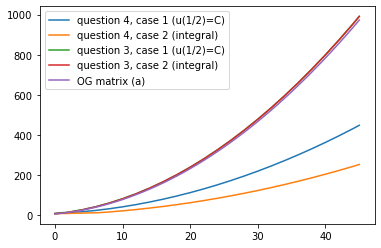

In [98]:
plt.plot(K4a, label = 'question 4, case 1 (u(1/2)=C)')
plt.plot(K4b, label = 'question 4, case 2 (integral)')
plt.plot(Ka, label = 'question 3, case 1 (u(1/2)=C)')
plt.plot(Kb, label = 'question 3, case 2 (integral)')
plt.plot(K, label = "OG matrix (a)")
plt.legend()